Olá, Isabelle!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

In [1]:
import pandas as pd
data = pd.read_csv("/datasets/games.csv")

print(data.head())  
print(data.info())  

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

In [2]:
data.columns = data.columns.str.lower()

In [3]:
data['year_of_release'] = data['year_of_release'].fillna(-1).astype(int)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A imputação deve ser feita com cuidado. O que leva a imputar com -1?
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:</b>   

A coluna year_of_release contém valores ausentes (NaN) que não podem ser convertidos diretamente para o tipo de dados int. O -1 foi a maneira de lidar com os valores ausentes na coluna "year_of_release" e preenchê-los com um valor padrão, que indicaria que o ano de lançamento é desconhecido. <a class="tocSkip"></a>
</div>

In [4]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [5]:
data['rating'] = data['rating'].astype('category')

In [6]:
print(data.head())  
print(data.info()) 

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (tot

In [7]:
data['critic_score'].fillna(data['critic_score'].mean(), inplace=True)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].fillna(data['user_score'].mean(), inplace=True)
data['rating'] = data['rating'].cat.add_categories('none')
data['rating'].fillna('none', inplace=True)
print(data.isna()) 

        name  platform  year_of_release  genre  na_sales  eu_sales  jp_sales  \
0      False     False            False  False     False     False     False   
1      False     False            False  False     False     False     False   
2      False     False            False  False     False     False     False   
3      False     False            False  False     False     False     False   
4      False     False            False  False     False     False     False   
...      ...       ...              ...    ...       ...       ...       ...   
16710  False     False            False  False     False     False     False   
16711  False     False            False  False     False     False     False   
16712  False     False            False  False     False     False     False   
16713  False     False            False  False     False     False     False   
16714  False     False            False  False     False     False     False   

       other_sales  critic_score  user_

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O que te motiva a imputar com a média? Você não fez EDA para avaliar distribuições, etc
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:</b>   

Eu imputei a média pelo fato das colunas user_score (Pontuação do usuário) e critic_score (Pontuação crítica) serem pontuações, desta forma, entendi que a média seria uma valor coerente a ser usado ao invés de permanecer com valores nulos nestas colunas. <a class="tocSkip"></a>
</div>

In [8]:
print(data.head())  
print(data.info()) 

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45     76.000000    8.000000      E  
1      3.58      6.81         0.77     68.967679    7.125046   none  
2     12.76      3.79         3.29     82.000000    8.300000      E  
3     10.93      3.28         2.95     80.000000    8.000000      E  
4      8.89     10.22         1.00     68.967679    7.125046   none  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (tot

Neste primeiro ponto, os tipos de dados das colunas year_of_release e user_score foram alterados. A coluna year_of_release estava com o tipo de dados float e foi modificado para int, essa modificação foi necessária para trazer aos dados desta coluna mais integridade, uma vez que, a informação no tipo float dificultaria a leitura e tratativa das informações. A coluna user_score estava como object e foi modificado para float, esta modificação foi necessária pois os dados da coluna são dados numéricos, facilitando assim o trabalho com as informações constantes nela nas próximas etapas.

As colunas critic_score, user_score e rating tinham valores ausentes, optei por preencher os valores ausentes nas colunas critic_score e user_score com a mediana dos valores já existentes, e a coluna rating optei por preencher com none.

In [9]:
data['user_score'] = data['user_score'].replace('TBD', pd.NA)

In [10]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [11]:
print(data.head())  
print(data.info()) 

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45     76.000000    8.000000      E   
1      3.58      6.81         0.77     68.967679    7.125046   none   
2     12.76      3.79         3.29     82.000000    8.300000      E   
3     10.93      3.28         2.95     80.000000    8.000000      E   
4      8.89     10.22         1.00     68.967679    7.125046   none   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

A abreviação "TBD" na coluna "user_score",optei por substituí-la por um valor que represente adequadamente que a pontuação ainda está pendente de determinação. Nesse caso, "TBD" por NaN (Not a Number) para indicar que os valores estão em branco, tornando mais fácil trabalhar com esses dados em análises subsequentes.

In [12]:
games_per_year = data['year_of_release'].value_counts().sort_index()
print(games_per_year)  

-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      62
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: year_of_release, dtype: int64


Os dados são significativos, mostrando que houve um aumento nos lançamentos de jogos de 2002 a 2011, e voltando a ter uma redução de 2011 a 2016.

In [13]:
total_sales_per_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(total_sales_per_platform)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [14]:
sales_per_year = data.groupby('year_of_release')['total_sales'].sum()
print(sales_per_year)

year_of_release
-1        98.92
 1980     11.38
 1981     35.68
 1982     28.88
 1983     16.80
 1984     50.35
 1985     53.95
 1986     37.08
 1987     21.70
 1988     47.21
 1989     73.45
 1990     49.37
 1991     32.23
 1992     76.16
 1993     48.41
 1994     79.23
 1995     88.12
 1996    199.15
 1997    201.07
 1998    256.31
 1999    251.11
 2000    201.66
 2001    331.46
 2002    394.97
 2003    357.54
 2004    418.68
 2005    457.82
 2006    517.71
 2007    604.75
 2008    671.50
 2009    658.82
 2010    590.13
 2011    507.58
 2012    355.84
 2013    361.24
 2014    331.53
 2015    267.98
 2016    129.94
Name: total_sales, dtype: float64


In [15]:
first_year = data.groupby('platform')['year_of_release'].min()
print(first_year)

platform
2600      -1
3DO     1994
3DS       -1
DC      1998
DS        -1
GB        -1
GBA       -1
GC        -1
GEN     1990
GG      1992
N64       -1
NES     1983
NG      1993
PC        -1
PCFX    1996
PS        -1
PS2       -1
PS3       -1
PS4     2013
PSP       -1
PSV       -1
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii       -1
WiiU    2012
X360      -1
XB        -1
XOne    2013
Name: year_of_release, dtype: int64


In [16]:
last_year = data.groupby('platform')['year_of_release'].max()
print(last_year)

platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: int64


As plataformas que foram populares e ainda tem vendas significativas são o PS3, PS4, Wii, WiiU, X360 e Xone. Estas plataformas também tem uma tendência recente nas vendas de jogos, mantendo-se estáveis.

In [17]:
relevant_data = data[data['year_of_release'] >= 2013]
print(relevant_data)

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você precisa recortar a partir de 2013 (ou seja >= 2013)
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:</b>   

Recorte corrigido. <a class="tocSkip"></a>
</div>

In [18]:
leading_platforms = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(leading_platforms)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


In [19]:
platform_trends = relevant_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()
print(platform_trends)

year_of_release    2013    2014    2015   2016
platform                                      
3DS               56.57   43.76   27.78  15.14
DS                 1.54     NaN     NaN    NaN
PC                12.38   13.28    8.52   5.25
PS3              113.25   47.76   16.82   3.60
PS4               25.99  100.00  118.90  69.25
PSP                3.14    0.24    0.12    NaN
PSV               10.59   11.90    6.25   4.25
Wii                8.59    3.75    1.14   0.18
WiiU              21.65   22.03   16.35   4.60
X360              88.58   34.74   11.96   1.52
XOne              18.96   54.07   60.14  26.15


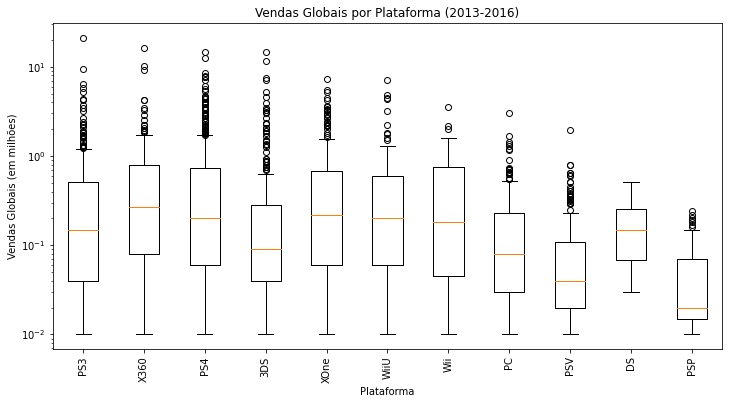

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.boxplot([relevant_data[relevant_data['platform'] == platform]['total_sales'] for platform in relevant_data['platform'].unique()],
            labels=relevant_data['platform'].unique())
plt.title('Vendas Globais por Plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=90)
plt.yscale('log') 
plt.show()


In [21]:
ps4_data = relevant_data[relevant_data['platform'] == 'PS4']
print(ps4_data)

                                 name platform  year_of_release         genre  \
31          Call of Duty: Black Ops 3      PS4             2015       Shooter   
42                 Grand Theft Auto V      PS4             2014        Action   
77                            FIFA 16      PS4             2015        Sports   
87       Star Wars Battlefront (2015)      PS4             2015       Shooter   
92     Call of Duty: Advanced Warfare      PS4             2014       Shooter   
...                               ...      ...              ...           ...   
16500                     Root Letter      PS4             2016     Adventure   
16503               Shin Hayarigami 2      PS4             2016     Adventure   
16526                      Dungeons 2      PS4             2016  Role-Playing   
16530         Carmageddon: Max Damage      PS4             2016        Action   
16585   Farming 2017 - The Simulation      PS4             2016    Simulation   

       na_sales  eu_sales  

In [22]:
correlation_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(correlation_critic)

0.3490095802924567


In [23]:
correlation_user = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(correlation_user)

-0.045390861003324096


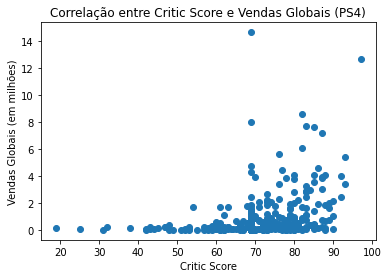

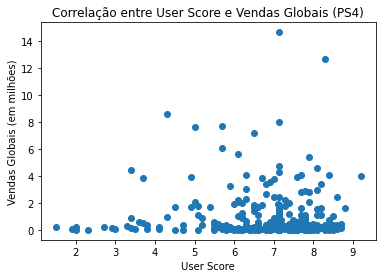

In [24]:
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('Correlação entre Critic Score e Vendas Globais (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('Correlação entre User Score e Vendas Globais (PS4)')
plt.xlabel('User Score')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()


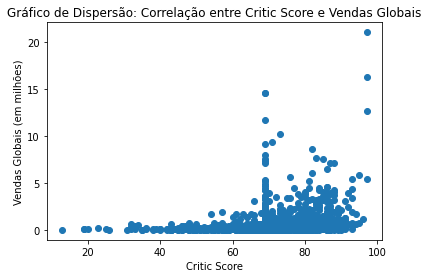

In [25]:
plt.scatter(relevant_data['critic_score'], relevant_data['total_sales'])
plt.title('Gráfico de Dispersão: Correlação entre Critic Score e Vendas Globais')
plt.xlabel('Critic Score')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

In [26]:
correlation_critic = relevant_data['critic_score'].corr(relevant_data['total_sales'])
print(correlation_critic)

0.2716918747226642


In [27]:
correlation_user = relevant_data['user_score'].corr(relevant_data['total_sales'])
print(correlation_user)

-0.03851822836482389


In [28]:
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64


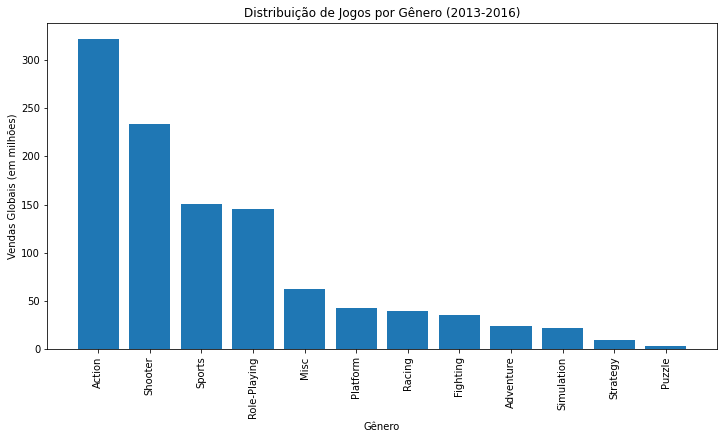

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(genre_sales.index, genre_sales)
plt.title('Distribuição de Jogos por Gênero (2013-2016)')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=90)
plt.show()

Gêneros com vendas altas: Action, Shooter, Sports e Role-Playing.
Gêneros com vendas baixas: Simulation, Adventure, Strategy e Puzzle.
No entanto, é importante notar que a lucratividade dos gêneros pode variar ao longo do tempo e depender de fatores como tendências de mercado, lançamentos de jogos populares e preferências dos jogadores.

In [30]:
na_platforms = relevant_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = relevant_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = relevant_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(na_platforms)
print(eu_platforms)
print(jp_platforms)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


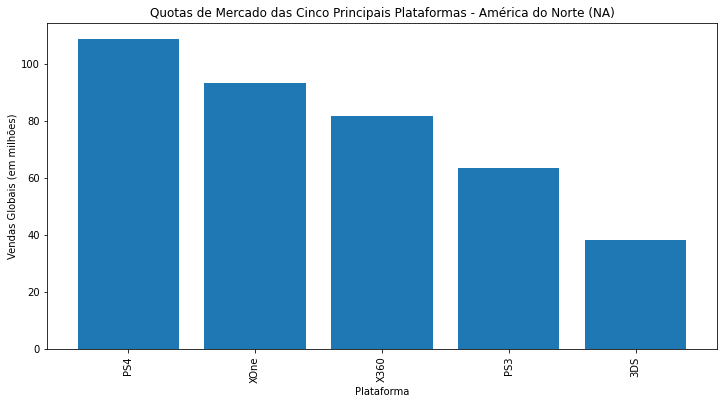

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(na_platforms.index, na_platforms)
plt.title('Quotas de Mercado das Cinco Principais Plataformas - América do Norte (NA)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=90)
plt.show()

Essa análise permite que identificar as cinco principais plataformas na região da América do Norte e compreende as variações nas quotas de mercado. Pode ser útil para estratégias de lançamento de jogos e marketing, levando em consideração as preferências regionais.

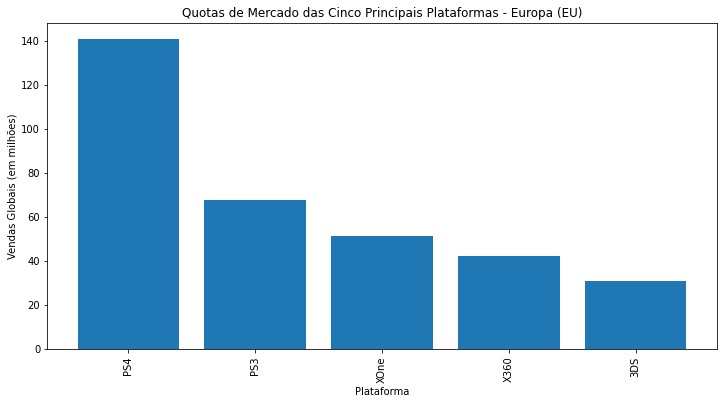

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(eu_platforms.index, eu_platforms)
plt.title('Quotas de Mercado das Cinco Principais Plataformas - Europa (EU)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=90)
plt.show()

Essa análise permite que identificar as cinco principais plataformas na região da Europa e compreende as variações nas quotas de mercado. Pode ser útil para estratégias de lançamento de jogos e marketing, levando em consideração as preferências regionais.

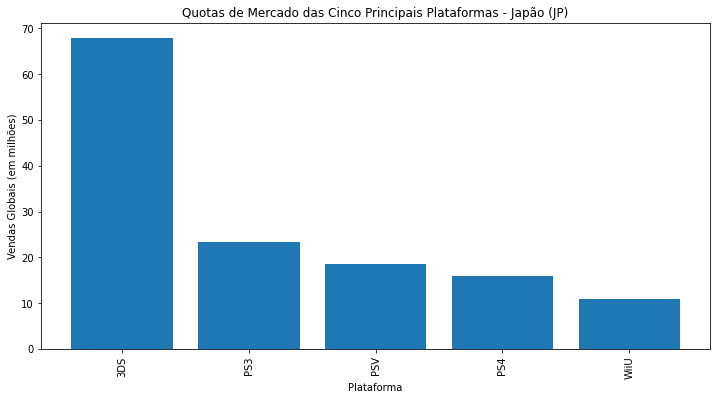

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(jp_platforms.index, jp_platforms)
plt.title('Quotas de Mercado das Cinco Principais Plataformas - Japão (JP)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=90)
plt.show()

Essa análise permite que identificar as cinco principais plataformas no Japão e compreende as variações nas quotas de mercado. Pode ser útil para estratégias de lançamento de jogos e marketing, levando em consideração as preferências regionais.

In [34]:
top_genres = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5)
print(top_genres)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Name: total_sales, dtype: float64


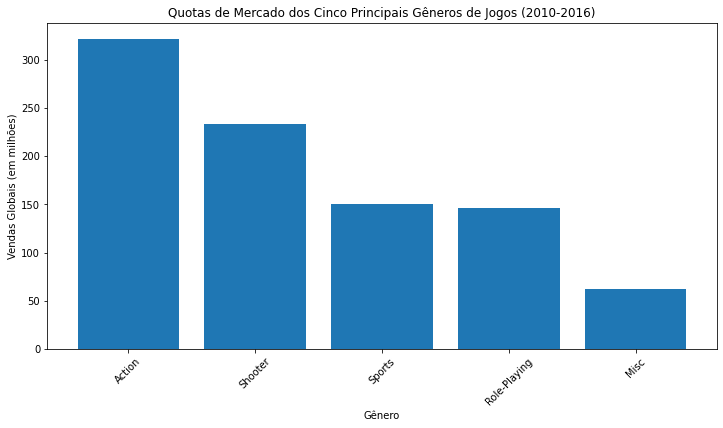

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(top_genres.index, top_genres)
plt.title('Quotas de Mercado dos Cinco Principais Gêneros de Jogos (2010-2016)')
plt.xlabel('Gênero')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.show()

As diferenças entre os gêneros de jogos refletem as preferências dos jogadores e os estilos de jogo. Cada gênero tem seus próprios elementos e atrações específicas. A popularidade de um gênero pode variar ao longo do tempo e de uma região para outra. A compreensão dessas diferenças é fundamental para o desenvolvimento e marketing de jogos.

A análise das quotas de mercado e a explicação das diferenças entre os gêneros ajudam a entender a dinâmica do mercado de videogames e a adaptar estratégias de desenvolvimento e lançamento de jogos para atender às preferências dos jogadores.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

A seção do teste de hipótese está incorreta. Você fixou os valores. Você precisa usar os dados fornececidos. Você precisa investigar essas duas hipóteses usando so dados reais/fornecidos:
    
- Teste de hipótese para verificar se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas    
- Teste de hipótese para verificar se as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

Para isso você precisa seguir esses passos:
- Definir a hipótese nula (ex: a altura média é igual entre homem e mulheres)
- Definir a hipótese alternativa (ex: a altura média não é igual entre homem e mulheres)
- Usar o teste Levene para avaliar a suposição de igualdade de variâncias do teste T (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)
- Se a hipótese nula de Levene não for rejeita, usamos equal_var=True, senão usamos equal_var=False no teste T
- Avaliar o resultado do teste
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno:</b>   

Teste de hipótese corrigido. <a class="tocSkip"></a>
</div>

In [36]:
from scipy.stats import ttest_ind, levene

ratings_xbox_one = data[data['platform'] == 'XOne']['user_score'].dropna()
ratings_pc = data[data['platform'] == 'PC']['user_score'].dropna()

statistic, p_value_levene = levene(ratings_xbox_one, ratings_pc)

if p_value_levene > 0.05:
    equal_var = True
else:
    equal_var = False

t_statistic, p_value_t = ttest_ind(ratings_xbox_one, ratings_pc, equal_var=equal_var)

alpha = 0.05
if p_value_t < alpha:
    print("Rejeite a hipótese nula: As médias não são iguais.")
else:
    print("Não rejeite a hipótese nula: As médias são iguais.")

Rejeite a hipótese nula: As médias não são iguais.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

De onde saíram essas notas? Você precisa usar as notas fornecidas, para isso você precisa indexar: relevant_data.loc[relevant_data['platform'] == 'X360', 'user_score']
</div>

In [37]:
ratings_action = data[data['genre'] == 'Action']['user_score'].dropna()
ratings_sports = data[data['genre'] == 'Sports']['user_score'].dropna()

statistic, p_value_levene = levene(ratings_action, ratings_sports)

if p_value_levene > 0.05:
    equal_var = True
else:
    equal_var = False

t_statistic, p_value_t = ttest_ind(ratings_action, ratings_sports, equal_var=equal_var)

alpha = 0.05
if p_value_t < alpha:
    print("Rejeite a hipótese nula: As médias não são iguais.")
else:
    print("Não rejeite a hipótese nula: As médias são iguais.")



Não rejeite a hipótese nula: As médias são iguais.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

De onde saíram essas notas? Você precisa usar as notas fornecidas, para isso você precisa indexar: relevant_data.loc[relevant_data['platform'] == 'X360', 'user_score']
</div>

Hipótese Nula (H0): Afirma que as médias das classificações de usuários nos dois gêneros não são iguais. Ela assume que há diferença significativa nas classificações entre esses gêneros.
Hipótese Alternativa (H1): Afirma que as médias das classificações são iguais, ou seja, não existe uma diferença significativa entre as classificações.

Nível de Significância (Alfa): O valor típico é 0,05, o que significa que estamos dispostos a aceitar um erro de 5% ao rejeitar a H0.

Comparação com o Nível de Significância: Comparamos o valor-p calculado com o nível de significância (alfa) estabelecido. Se o valor-p for menor que alfa, rejeitamos a H0, o que significa que há evidência estatística para a H1. Se o valor-p for maior que alfa, não rejeitamos a H0, indicando que não há evidência estatística para a H1.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.
    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Recortar os dados a partir do período indicado </span>
 * <span class="text-danger"> Retificar a seção de teste de hipótese </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Parabéns pela aprovação. Comemore.
Eu acredito que a única questão a observar é quanto à imputação de dados. Por exemplo, imputar as notas com média talvez não seja a opção mais adquada. Por exemplo, podemos utilizar a média ou mediana em função do gênero e plataforma, buscar a média das notas do mesmo jogo mas em plataforma diferente. Outra opção usar a média por região e gênero, pois vamos analisar os dados por região. Em resumo, como analista/cientista de dados, precisamos buscar a melhor forma de fazer a imputação. Neste projeto, o melhor é não preencher.

Desejo sucesso na jornada.
</div>